<h2>Libraries</h2>
The main libraries that are used are tensorflow2, keras , numpy and pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

<h2> Importing the Data </h2>

The data is stored in a json file, which can be imported and used as a pandas dataframe.
This data was manually created by me. hence, it's not that big.<br>
we all know that deep learning requires large chunks of data. but, That is not the case here. I have utilized a neural network architecture powerful enough to handle this small amount of data

In [4]:
#importing the dataset
with open('/content/drive/MyDrive/dataset.json') as content:
  data1 = json.load(content)

In [5]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [6]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [7]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,halo,greeting
2,hi,greeting
3,hai,greeting
4,hey,greeting
...,...,...
940,bagaimana kerja aplikasi,hal3
941,tolong,hal3
942,bantuan,hal3
943,cara kerja,hal3


In [8]:
data = data.sample(frac=1)

<h2> Pre-Processing </h2>

Important pre-processing such as removing the punctuations, converting to lowercase, encoding the textual data to numerical data are done

In [9]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
176,deskripsi cerebrofit excel,obat51
672,obat menambah nafsu makan,ask25
374,obh nellco special pe sirup,obat115
785,obat demam sirup,ask61
257,obat enervon c syr,obat77
...,...,...
671,obat mata berair,ask25
943,cara kerja,hal3
698,obat panu,ask35
149,calsusol kapsul,obat42


In [10]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [11]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [12]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  603
output length:  296


<h2>Neural Network</h2>

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. the outputs of the embedding layer is the input of the reccurent layer with lstm gate. then, the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives has a corresponding vector for each word in the dataset

In [13]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [14]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [48]:
#training the model
train = model.fit(x_train,y_train,epochs=500)


Epoch 1/500
30/30 [==============================] - 0s 10ms/step - loss: 0.0109 - accuracy: 0.9905
Epoch 2/500
30/30 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9926
Epoch 3/500
30/30 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9905
Epoch 4/500
30/30 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.9905
Epoch 5/500
30/30 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9862
Epoch 6/500
30/30 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.9926
Epoch 7/500
30/30 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9915
Epoch 8/500
30/30 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 0.9926
Epoch 9/500
30/30 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 0.9905
Epoch 10/500
30/30 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9894
Epoch 1

<h2> Model Analysis </h2>

The model got a perfect accuracy of 100%. 

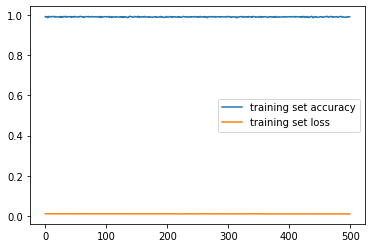

In [49]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [18]:
from tensorflow import keras

<h2> Testing </h2>

I have also tested the model in a way to mimic a human interacting with a bot and got positive results. however, This was very simple because of the tiny amount of data that I have created. but, the same model can also be used with large amount of data

In [ ]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Medic Bot : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : halo
Medic Bot :  hola, ada yang bisa saya bantu ?
You : obat masalah lambung
Medic Bot :  Neosanmag 4 Tablet
Neosanmag Fast 
You : vitamin anak
Medic Bot :  Vidoran Smart imunUp
You : cara kerja aplikasi
Medic Bot :  kamu tinggal memberitahukan gejala apa yang dialami atau sebutkan obat yang ingin kamu ketahui
You : minyak angin
Medic Bot :  Minyak angin cap kapak
Cap Rumah Minyak Kayu Putih 125 ml
Cap Lang Minyak Kayu Putih 30 ml
You : deskripsi minyak urut geliga
Medic Bot :  Minyak urut geliga

Harga :
Rp18.900 - Rp53.700

Kategori :
Otot,Tulang dan sendi,Minyak angin & Balsam

Indikasi Umum :
Untuk meredakan nyeri otot,nyeri akibat pukulan,memar dan keseleo

Dosis :
di oleskan secukupnya pada bagian yang sakit

Aturan Pakai :
secukupnya pada bagian yang sakit
You : terima kasih
Medic Bot :  Konidin Sirup
Lactacyd Teen Bloom
Lacto-B
Laserin Madu
Laserin Sirup
L-Bio
Listerin 250
Merit Plus
Mextril
Minyak angin cap kapak
You : terimakasih
Medic Bot :  moga lekas sembuh


<h2> Conclusion </h2>
So, This is the Chatbot that I have created with tensorflow2 utilizing the power of embedding matrix.<br>
This was created in memory og <b> Going Merry </b> , a ship from a manga called "One Piece" which revolves around the story of 5 pirates. 